In [14]:
import time
import os 
import tracemalloc
import matplotlib.pyplot as plt
import pandas as pd

from data_loader import load_market_data
from strategies import NaiveMovingAverage, WindowedMovingAverage, RefactoredMovingAverage

        strategy nTicks    runtime    memory
0       naive_ma     1k   0.004083  0.008484
1       naive_ma    10k   0.278476  0.091461
2       naive_ma   100k  25.439208  0.860107
3    windowed_ma     1k   0.001170  0.000557
4    windowed_ma    10k   0.011481  0.000053
5    windowed_ma   100k   0.113541  0.000053
6  refactored_ma     1k   0.000925  0.000053
7  refactored_ma    10k   0.009133  0.000053
8  refactored_ma   100k   0.090415  0.000053


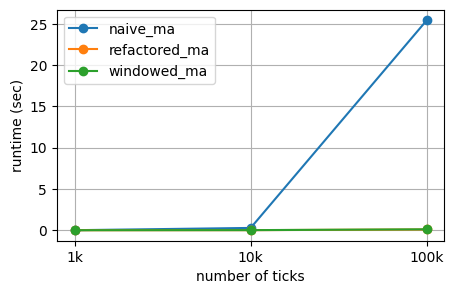

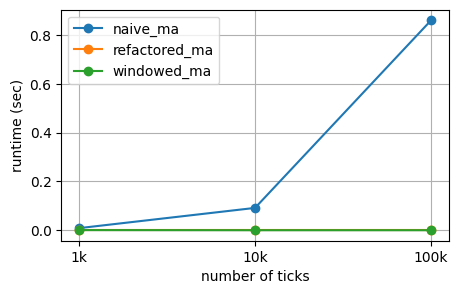

In [15]:
def measure_performance(strategy, data):
    tracemalloc.start()
    start = time.perf_counter()
    
    for tick in data:
        strategy.generate_signals(tick)
    
    end = time.perf_counter()
    runtime = end - start

    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    #converts bytes to MB
    peak_mb = peak / (1024 * 1024)

    return runtime, peak_mb


if __name__ == "__main__":
    data = load_market_data("/Users/jacopomichelacci/FINM_32500/data/market_data.csv")

    strategies = {
        "naive_ma" : NaiveMovingAverage(),
        "windowed_ma" : WindowedMovingAverage(),
        "refactored_ma" : RefactoredMovingAverage()
        }
    
    dict_ticks = {
        "1k" : 1000,
        "10k" : 10000,
        "100k" : 100000
    }
    
    results = []

    for name, strat in strategies.items():
        for tick_num, tick_val in dict_ticks.items():
            runtime, peak_mb = measure_performance(strategy=strat, data=data[:tick_val])
            results.append((name, tick_num, runtime, peak_mb))
            #print(f"Strategy: {name} ||| num ticks: {tick_num}\nStrategy runtime: {runtime:.4f} seconds\nStrategy memory allocation: {peak_mb:.4f} mb\n\n") 


df = pd.DataFrame(
    results,
    columns=["strategy", "nTicks", "runtime", "memory"]
)
print(df)

#runtime 
plt.figure(figsize=(5,3))
for name, group in df.groupby("strategy"):
    plt.plot(group["nTicks"], group["runtime"], marker="o", label=name)

plt.xlabel("number of ticks")
plt.ylabel("runtime (sec)")
plt.legend()
plt.grid(True)
plt.show()

#memory allocation
plt.figure(figsize=(5,3))
for name, group in df.groupby("strategy"):
    plt.plot(group["nTicks"], group["memory"], marker="o", label=name)

plt.xlabel("number of ticks")
plt.ylabel("runtime (sec)")
plt.legend()
plt.grid(True)
plt.show()


